In [419]:
import numpy as np
import pandas as pd
import cv2
import os
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [435]:
def moveup(img):
    while True:
        if np.all(img[0] >= 240):
            img = img[1:]
        else:
            break
    return img

def movedown(img):
    while True:
        if np.all(img[-1] >= 240):
            img = img[:-1]
        else:
            break
    return img

def moveleft(img):
    while True:
        if np.all(img[:, 0] >= 240):
            img = img[:, 1:]
        else:
            break
    return img

def moveright(img):
    while True:
        if np.all(img[:, -1] >= 240):
            img = img[:, :-1]
        else:
            break
    return img

def rescale(img):
    img = moveup(img)
    img = movedown(img)
    img = moveleft(img)
    img = moveright(img)
    return img

In [437]:
input_dir = 'num_data'
categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

data = []
labels = []

for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = rescale(img)
        img = cv2.resize(img, (28, 28))
        img = img.flatten()
        data.append(img)
        labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)

before rescale


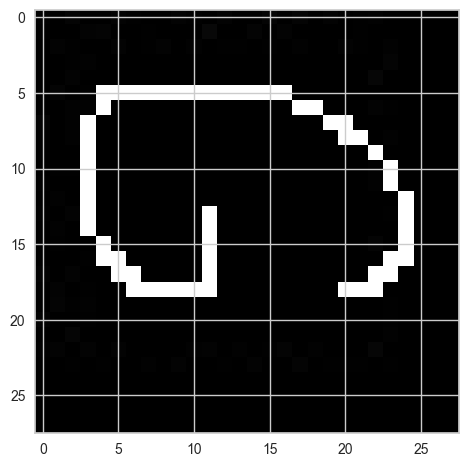

after rescale


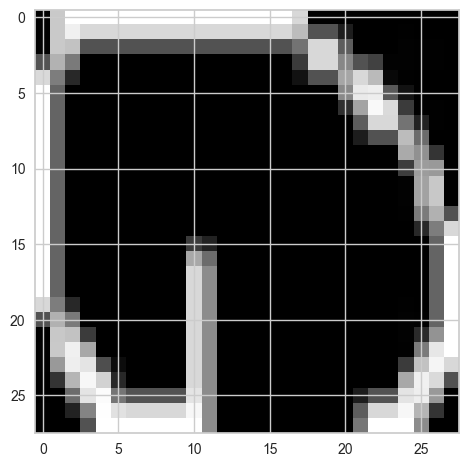

In [436]:
img = cv2.imread('num_data\\1\\1-1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print('before rescale')
plt.imshow(img)
plt.show()

img = rescale(img)
img = cv2.resize(img, (28, 28))

print('after rescale')
plt.imshow(img)
plt.show()

In [423]:
df = pd.DataFrame(data)
df['labels'] = labels
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,255,255,255,255,255,255,255,254,244,188,...,5,15,148,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,223,32,0,...,0,0,159,255,255,255,255,255,255,0
2,255,255,255,255,255,255,255,255,181,63,...,10,67,204,255,255,255,255,255,255,0
3,255,255,255,255,255,255,255,255,255,187,...,86,241,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,225,77,21,0,...,118,255,255,255,255,255,255,255,255,0


In [424]:
df.shape

(350, 785)

In [425]:
df['labels'].value_counts()

0    35
1    35
2    35
3    35
4    35
5    35
6    35
7    35
8    35
9    35
Name: labels, dtype: int64

In [426]:
s = setup(df, target = 'labels', session_id = 123, train_size = 0.8)

In [427]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:20:26
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [428]:
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9250,0.9969,0.9250,0.9418,0.9238,0.9165,0.9187,1.272
svm,SVM - Linear Kernel,0.9214,0.0000,0.9214,0.9371,0.9172,0.9125,0.9150,0.368
et,Extra Trees Classifier,0.9179,0.9951,0.9179,0.9379,0.9166,0.9085,0.9112,0.491
rf,Random Forest Classifier,0.9143,0.9947,0.9143,0.9230,0.9068,0.9045,0.9077,0.781
lightgbm,Light Gradient Boosting Machine,0.8821,0.9906,0.8821,0.9138,0.8796,0.8689,0.8727,2.276
knn,K Neighbors Classifier,0.8107,0.9688,0.8107,0.8601,0.8042,0.7894,0.7967,0.285
lda,Linear Discriminant Analysis,0.8000,0.9699,0.8000,0.8431,0.7884,0.7774,0.7838,0.359
gbc,Gradient Boosting Classifier,0.7786,0.9683,0.7786,0.8215,0.7702,0.7539,0.7597,19.215
nb,Naive Bayes,0.7214,0.8631,0.7214,0.7654,0.7056,0.6899,0.6982,0.309
dt,Decision Tree Classifier,0.6929,0.8295,0.6929,0.6977,0.6721,0.6582,0.6643,0.268


In [429]:
model = create_model('et')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:25:11
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9971,0.9286,0.9494,0.9276,0.9206,0.9232
1,0.9643,1.0000,0.9643,0.9732,0.9633,0.9602,0.9616
2,0.8929,0.9950,0.8929,0.9196,0.8959,0.8807,0.8832
3,0.9643,0.9914,0.9643,0.9762,0.9643,0.9603,0.9616
4,0.8929,0.9900,0.8929,0.9304,0.8912,0.8805,0.8856
5,0.9643,1.0000,0.9643,0.9732,0.9633,0.9602,0.9616
6,0.8214,0.9886,0.8214,0.8393,0.8139,0.8009,0.8043
7,0.8929,0.9921,0.8929,0.9107,0.8908,0.8807,0.8832
8,0.9286,0.9972,0.9286,0.9494,0.9252,0.9205,0.9231


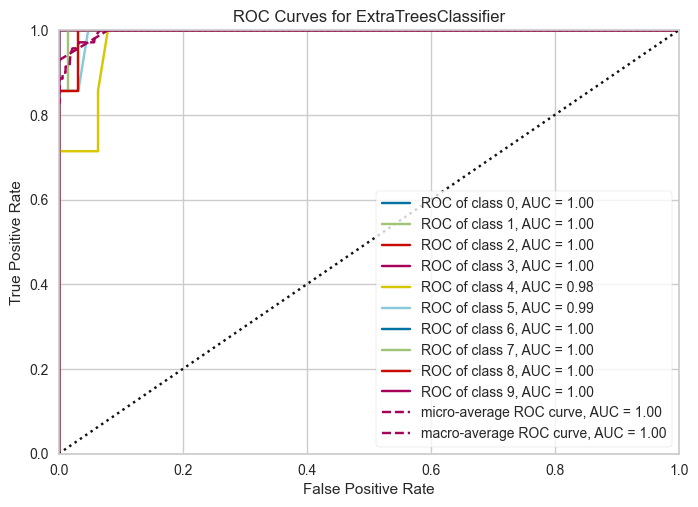

In [430]:
plot_model(model)

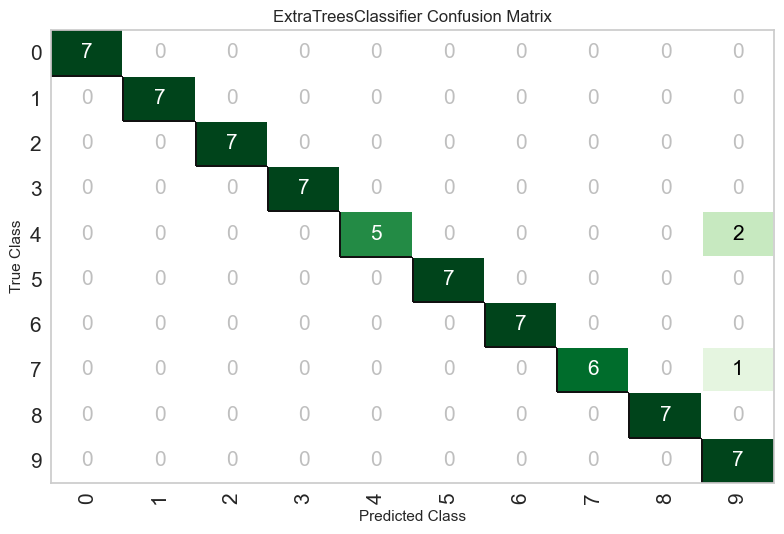

In [431]:
plot_model(model, 'confusion_matrix')

sklearn

In [438]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

In [439]:
pipeextratree = Pipeline([('scaler', MinMaxScaler()),
                 ('model', ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False))])
pipeextratree.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 MinMaxScaler(clip=False, copy=True, feature_range=(0, 1))),
                ('model',
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      oob_score=False, random_state=123,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [440]:
y_pred = pipeextratree.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.86      0.92         7
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00         7
           4       0.83      0.71      0.77         7
           5       0.78      1.00      0.88         7
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7

    accuracy                           0.94        70
   macro avg       0.95      0.94      0.94        70
weighted avg       0.95      0.94      0.94        70

